In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from scipy.stats import mode

In [2]:
# ----- Load Dataset -----
data = load_breast_cancer()
X = data.data
y_true = data.target  # 0 = malignant, 1 = benign

In [4]:
# ----- Elbow Method to Find Optimal k -----
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # Inertia = sum of squared distances

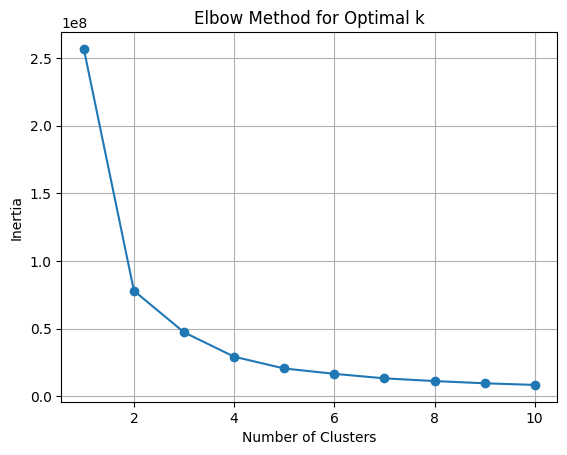

In [5]:
# Plot elbow curve
plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [6]:
# Choose optimal k manually (based on the elbow point)
optimal_k = 2  # elbow is usually at 2 for this dataset
print(f"Using k = {optimal_k}")

Using k = 2


In [7]:
# ----- Apply KMeans with Optimal k -----
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

In [8]:
# ----- Map Clusters to Actual Labels -----
labels = np.zeros_like(y_pred)
for i in range(optimal_k):
    mask = (y_pred == i)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

In [9]:
# ----- Evaluation -----
acc = accuracy_score(y_true, labels)
ari = adjusted_rand_score(y_true, y_pred)
conf_mat = confusion_matrix(y_true, labels)

print("Accuracy Score:", acc)
print("Adjusted Rand Index (ARI):", ari)
print("Confusion Matrix:\n", conf_mat)

Accuracy Score: 0.8541300527240774
Adjusted Rand Index (ARI): 0.49142453622455523
Confusion Matrix:
 [[130  82]
 [  1 356]]
